In [32]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

In [33]:
news_data = pd.read_csv('D:\\DML\\fake_or_real_news.csv\\fake_or_real_news.csv')

In [34]:
news_data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [35]:
news_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [36]:
news_data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

# Splitting Data

In [37]:
# Splitting the data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(news_data['text'],news_data['label'], test_size=0.2)
print("x_train =", x_train.shape)
print("x_test =", x_test.shape)
print("y_train =", y_train.shape)
print("y_test", y_test.shape)

x_train = (5068,)
x_test = (1267,)
y_train = (5068,)
y_test (1267,)


# TfidfVectorizer

In [38]:
## The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.
# TF (Term Frequency)
# The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.
# IDF (Inverse Document Frequency):
# Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

In [39]:
term_frequency = TfidfVectorizer(stop_words='english', max_df=0.8)
x_train = term_frequency.fit_transform(x_train)
x_test = term_frequency.transform(x_test)
print("x_test = ",x_test.shape)
print("x_train = ",x_train.shape)

x_test =  (1267, 61441)
x_train =  (5068, 61441)


# Fitting the model

In [40]:
# We have to build a model to accurately classify a piece of news as REAL or FAKE.
#We have used six models PassiveAggressiveClassifier, GaussianNB
#DecisionTreeClassifier, RandomForestClassifier, SVC, LogisticRegression so as to compare the accuracy of these models. It will help us to find which model fits the data and predict real and fake news accurately.


In [41]:
model1 = PassiveAggressiveClassifier(max_iter=300)
model1.fit(x_train,y_train)
model2 = GaussianNB()
model2.fit(x_train.toarray(),y_train)
model3 = DecisionTreeClassifier()
model3.fit(x_train,y_train)
model4 = RandomForestClassifier()
model4.fit(x_train,y_train)
model5 = SVC()
model5.fit(x_train,y_train)
model6 = LogisticRegression()
model6.fit(x_train,y_train)

LogisticRegression()

# Prediction for testing data

In [43]:
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test.toarray())
y_pred3 = model3.predict(x_test)
y_pred4 = model4.predict(x_test)
y_pred5 = model5.predict(x_test)
y_pred6 = model6.predict(x_test)

In [45]:
# Calculating accuracy score
acc1 = accuracy_score(y_test,y_pred1)
acc2 = accuracy_score(y_test,y_pred2)
acc3 = accuracy_score(y_test,y_pred3)
acc4 = accuracy_score(y_test,y_pred4)
acc5 = accuracy_score(y_test,y_pred5)
acc6 = accuracy_score(y_test,y_pred6)

In [46]:
labels={'PassiveAggressiveClassifier':acc1,'GaussianNB':acc2,'DecisionTreeClassifier':acc3,'RandomForestClassifier':acc4,
        'SVC':acc5,'LogisticRegression':acc6}
for model,accuracy in labels.items():
    print(str(model)+' : '+str(accuracy))

PassiveAggressiveClassifier : 0.9289660615627466
GaussianNB : 0.8105761641673244
DecisionTreeClassifier : 0.8089976322020521
RandomForestClassifier : 0.8966061562746646
SVC : 0.9250197316495659
LogisticRegression : 0.9131807419100236


Text(0.5, 1.0, 'Fake news')

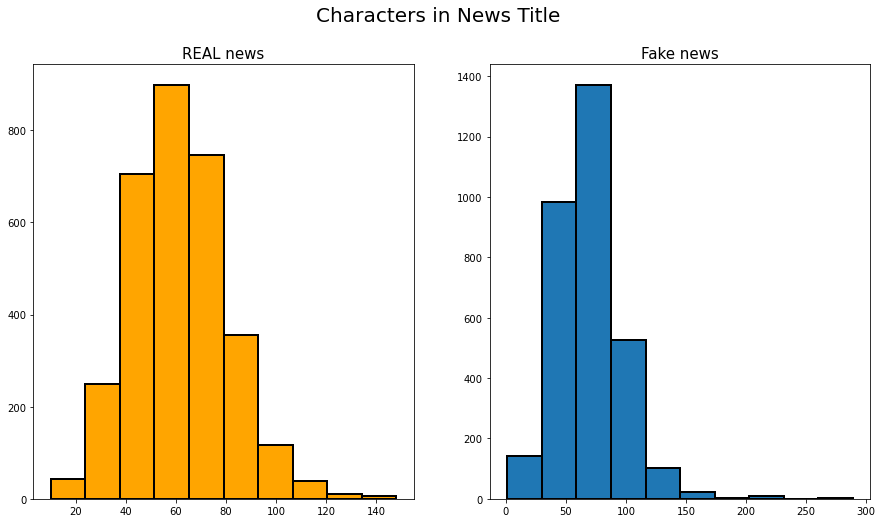

In [51]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Characters in News Title',fontsize=20)
news_len=news_data[news_data['label']=='REAL']['title'].str.len()
ax1.hist(news_len,color='orange',linewidth=2,edgecolor='black')
ax1.set_title('REAL news',fontsize=15)
news_len=news_data[news_data['label']=='FAKE']['title'].str.len()
ax2.hist(news_len,linewidth=2,edgecolor='black')
ax2.set_title('Fake news',fontsize=15)

<BarContainer object of 6 artists>

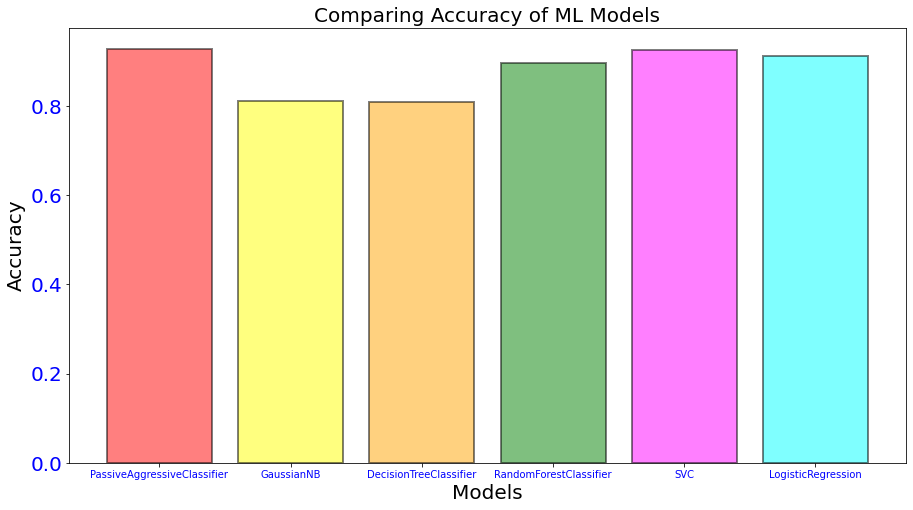

In [52]:
plt.figure(figsize=(15,8))
plt.title('Comparing Accuracy of ML Models',fontsize=20)
colors=['red','yellow','orange','green','magenta','cyan']
plt.xticks(fontsize=10,color='blue')
plt.yticks(fontsize=20,color='blue')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5)